<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**사이킷런으로 시작하는 머신러닝**
##01. 사이킷런 소개와 특징
- 사이킷런 scikit-learn : 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
  - 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리 제공
  - 사이킷런을 별도로 설치해야한다면 pip 와 Anaconda의 conda 명령어를 통해 가능 - 가급적 conda 권장


```
conda install scikit-learn
pip install scikit-learn
```



In [1]:
import sklearn
print(sklearn.__version__)  #버전 확인

1.0.2


##02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
- 분류 classification : 대표적인 지도학습 supervised learning 방법
  - 지도학습 supervised learning : 학습을 위한 다양한 피처와 분류 결정값인 Label 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블 예측, 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
    - 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
    - 테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트
- 사이킷런 패키지 내의 모듈명은 sklearn으로 시작
  - sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
  - sklearn.tree : 트리 기반 ML알고리즘을 구현한 클래스의 모임
  - sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있음
- 붓꽃 데이터 세트를 생성하는 데는 load_iris()를 이용하며, ML 알고리즘 의사 결정 트리 Decision Tree 알고리즘으로, 이를 구현한 DecisionTreeClassifier 를 적용
  - 의사 결정 트리 : 데이터를 학습하고 예측하는 머신러닝 기법을 구현한 주요 알고리즘

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

#붓꽃 데이터 세트 로딩
iris = load_iris()
#iris.data는 Iris 데이터 세트에서 feature 만으로 된 데이터를 numpy로 갖고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 갖고 있음
iris_label = iris.target
print('iris target 값: ', iris_label)
print('iris target 명: ', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- feature에는 sepal length, sepal width, petal length, petal width가 있음
- 레이블은 0,1,2 세가지 값으로 돼있으며 0이 setosa, 1이 versicolor, 2가 virginica


- 학습용 데이터와 테스트용 데이터는 반드시 분리해야 됨, 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문
  - train_test_split() : 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할
    - 첫번쨰 파라미터 : 피처 데이터 세트, 두번째 파라미터 : 레이블 데이터 세트, test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율, random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생값
    - 무작위로 데이터를 분리하므로 random_state을 지정하지 않으면 수행할 때무다 다른 학습/테스트 용 데이터를 만들 수 있음

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
#학습용 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환

- 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행
  - 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 함, 일반적으로 테스트 데이터 세트 이용
  - DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

In [9]:
#DecisionTreeClassfier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [10]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가
  - 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정
    - 정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
    - accuracy_score() : 첫번째 파라미터로 실제 레이블 데이터 세트, 두번째 파라미터로 예측 레이블 데이터 세트 입력하면 정확도 측정

In [11]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


**1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리**

**2. 모델 학습 : 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습시킴**

**3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측함**

**4. 평가 : 이렇게 예측된 결괏값과 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가함**


##03. 사이킷런의 기반 프레임워크 익히기
### Estimator 이해 및 fit(), predict()메서드
- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict()메서드를 제공
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭, 이들을 합쳐서 Estimator 클래스라고 부름, Estimator 클래스는 fit() 과 predict()를 내부에서 구현함
- cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받음, 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝 수행
- 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용
  - 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
  - fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행
  - fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공, 별도로 호출할 필요를 줄여주지만 사용에 약간 주의 필요


###사이킷런의 주요 모듈 - 94쪽
###내장된 예제 데이터 세트
- 사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼있음, datasets 모듈에 있는 여러 API를 호출해 만들 수 있음
- fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터, 최초 사용 시에 인터넷에 연결돼 있지 않으면 사용할 수 없음 
  - fetch_covtype(): 회귀 분석용 토지 조사 자료
  - fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
  - fetch_olivetti_faces() : 얼굴 이미지 자료
  - fetch_lfw_people() : 얼굴 이미지 자료
  - fetch_lfw_pairrs() : 얼굴 이미지 자료
  - fetch_rcv1() : 로이터 뉴스 말뭉치
  - fetch_mldata() : ML 웹사이트에서 다운로드
- 분류와 클러스터링을 위한 표본 데이터 생성기
  - datasets.make_classification() : 분류를 위한 데이터 세트 만듦, 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해줌
  - datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해줌, 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어줌
- 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 돼잇음 
  - 키는 보통 data, target, target_name, feature_names, DESCR
    - data는 피처의 데이터 세트를 가리킴
    - target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
    - target_names는 개별 레이블의 이름을 나타냄
    - feature_names는 피처의 이름을 나타냄
    - DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄
    - data, target은 넘파이 배열 타입이며, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트 타입임, DESCR 은 스트링 타입

In [12]:
#피터의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 key 값을 지정하면 됨
from sklearn.datasets import load_boston
iris_data = load_iris()
print(type(iris_data))    #Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [13]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터 키는 피처들의 데이터 값 가리킴, 데이터 세트가 딕셔너리 형태이기 때문에 피터 데이터값을 추출하기 위해서는 데이터 세트.data 혹은 ['data']를 이용하면 됨, 마찬가지로 target, feature_names, DESCR key가 가리키는 데이터 값의 추출도 동일하게 수행하면 됨
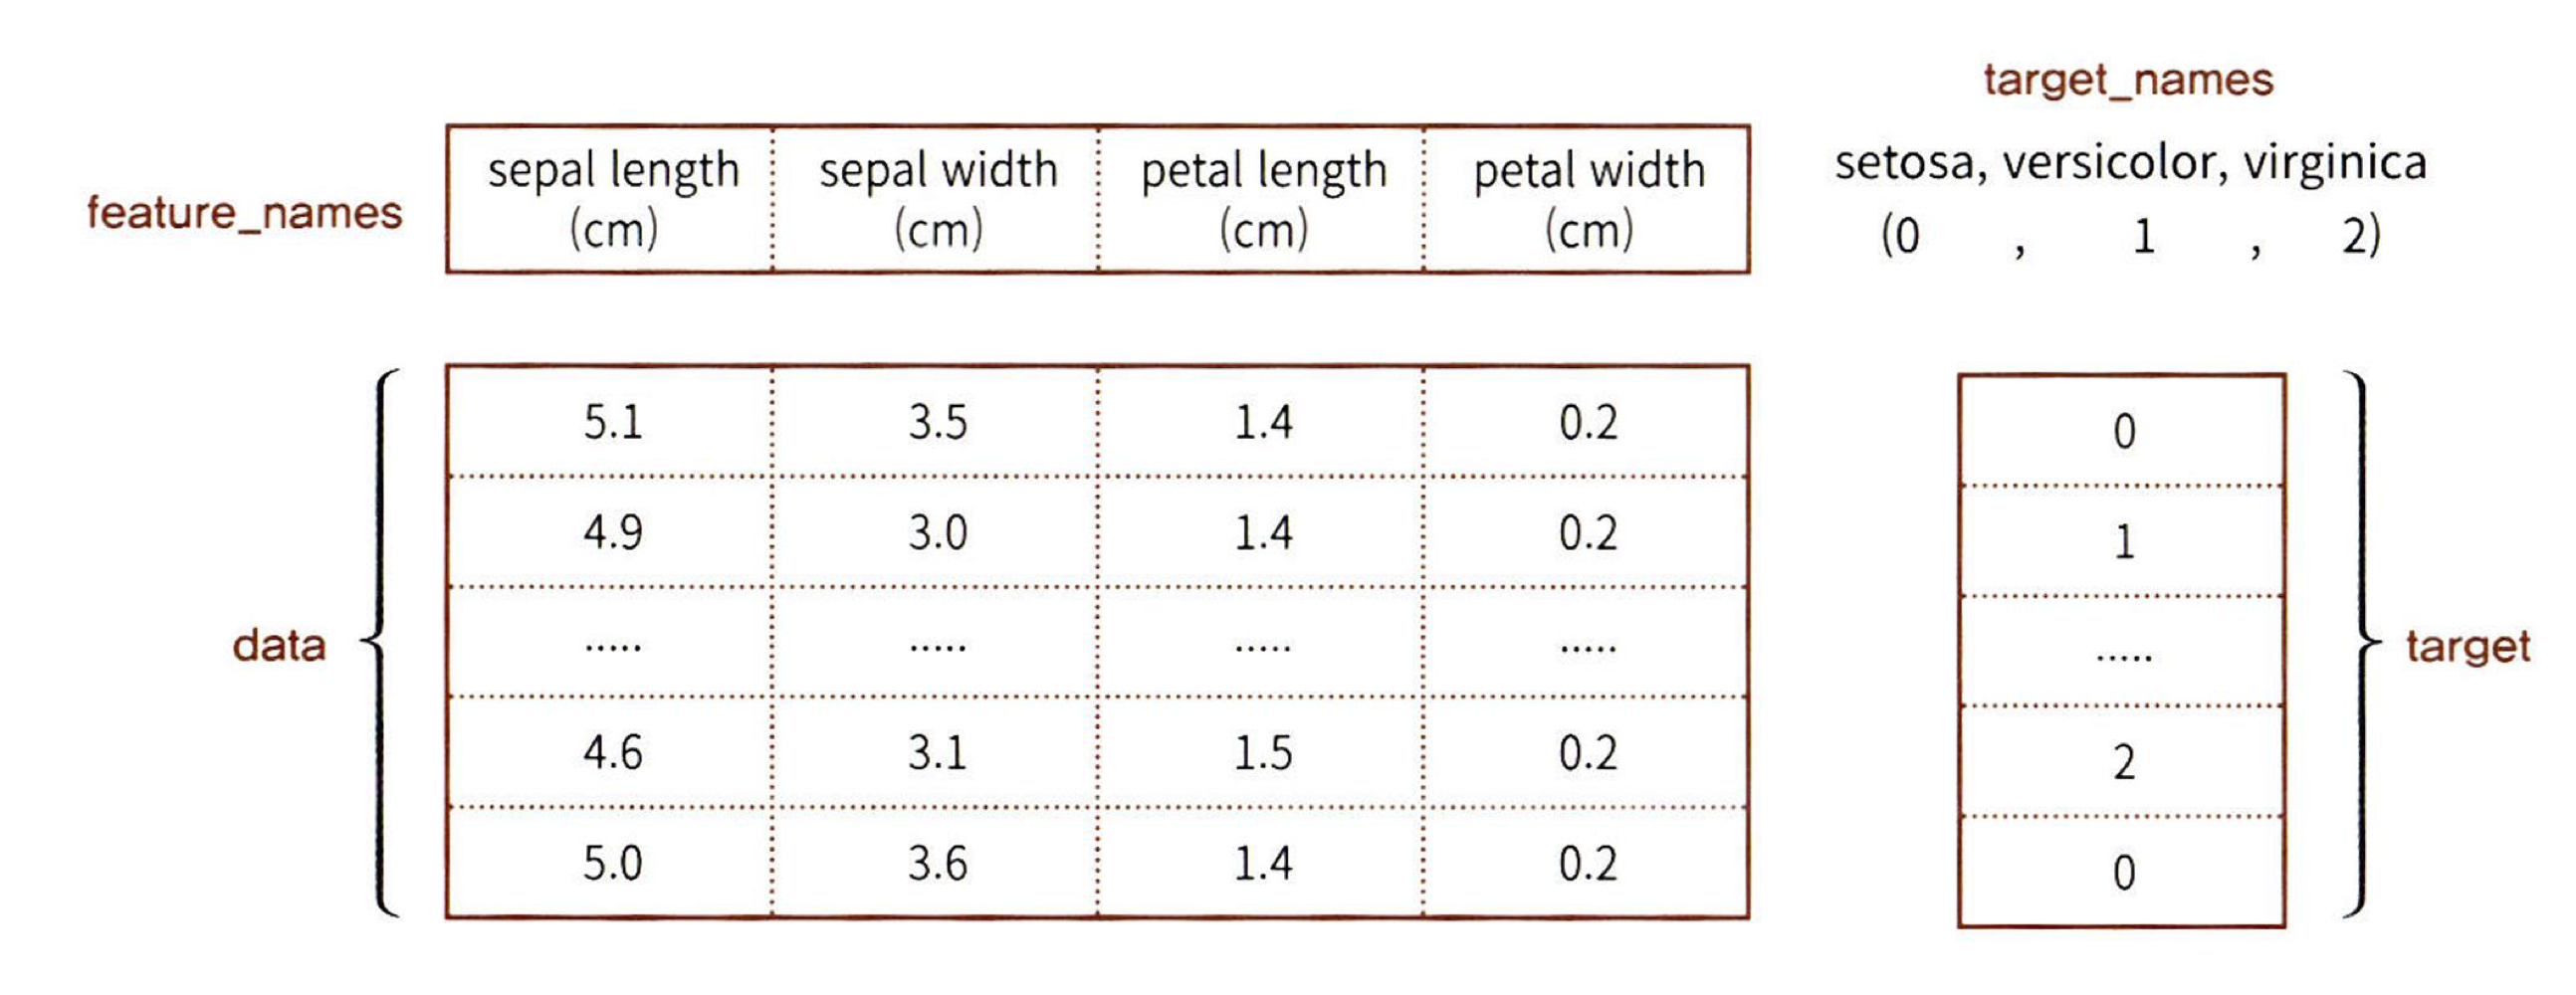

In [14]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print('feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data.data)

print('\n target의 type:', type(iris_data.target))
print('target_namesdml shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.

##04. Model Selection 모듈 소개 
- 사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공
###학습/테스트 데이터 세트 분리 - train_test_split()


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

#테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 정확도가 100%가 나옴

예측 정확도: 1.0


**-train_test_split()** : sklearn.model_selection에서 로드
  - 첫번째 파라미터로 피처 데이터 세트, 두번째 파라미터로 레이블 데이터 세트 입력받음
  - test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정함, 디폴트는 0.25
  - train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것이나 결정, test_size parameter를 통상적으로 사용하기 때문에 잘 사용하지 않음
  - shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 디폴트는 True, 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
  - random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
  - 반환값은 튜플 형태, 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환됨
  

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
#학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요

예측 정확도: 0.9556


###교차 검증
- 별도의 테스트용 데이터를 사용하는 방법 역시 과적합에 취약한 약점을 가질 수 있음 -> 개선하기 위해 교차검증을 이용해 더 다양한 학습과 평가 수행
  - 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 교차검증 : 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것, 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더 손쉽게 할 수 있음
  - 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스
###K 폴드 교차 검증
- 가장 보편적으로 사용되는 교차 검증 기법, K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- KFold와 StratifiedKFold 클래스 제공
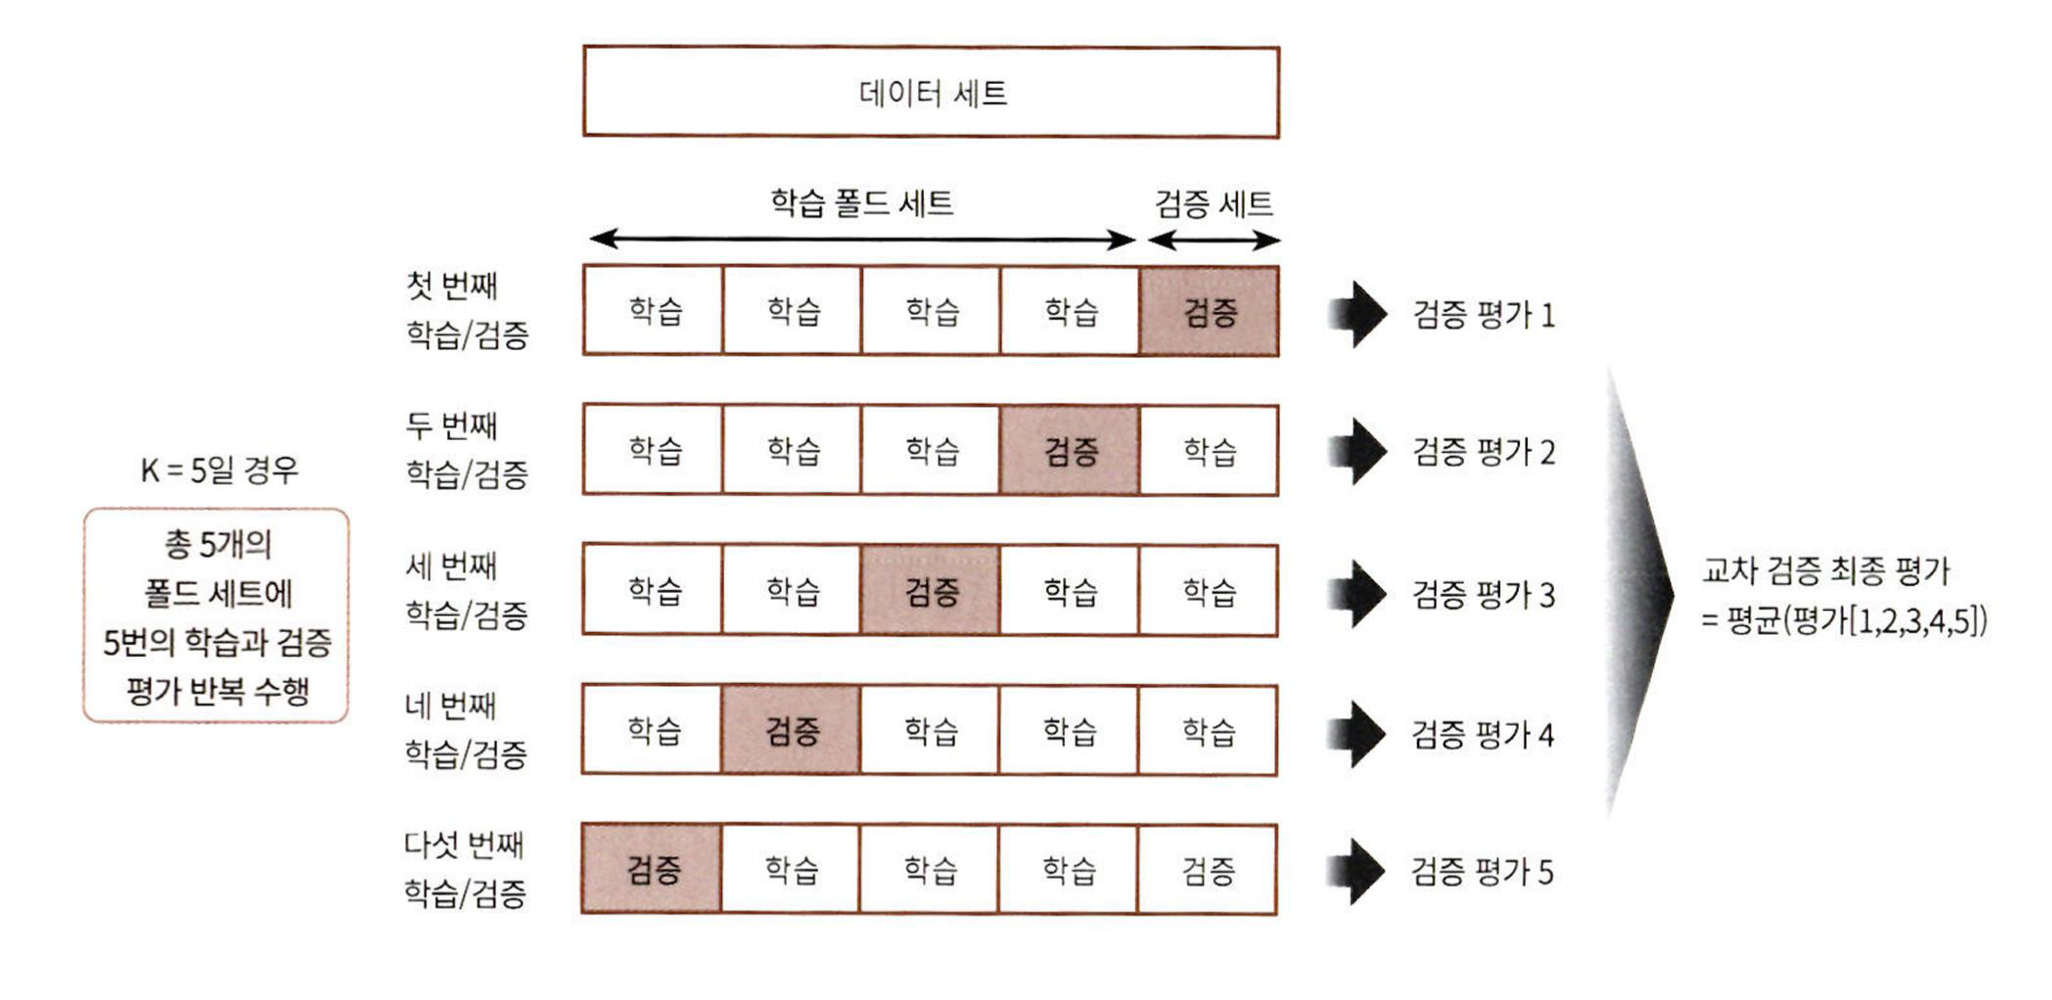


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
df_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])  #전체 iris 데이터는 모두 150개, 따라서 학습용 데이터 세트 120개 테스트 데이터 세트 30개로 분할됨

붓꽃 데이터 세트 크기:  150


- KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환함
- 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야함

In [23]:
n_iter = 0

#KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #개별 iteration 별 정확도를 합하여 평균 정확도 계산
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 0.98335

#3 교차 검증 정확도: 0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9555666666666666

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.95

#5 교차 검증 정확도: 0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9400000000000001


- Stratified K 폴드 : 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
  - 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한 쪽으로 치우치는 것
  - K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌
  - 이를 위해 Stratified K 폴드는 원본 데이텅의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

In [25]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [28]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
  print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
  iris_df['label'].value_counts()


## 교차 검증: 1
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됐음, 예를 들어 학습 레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못하므로 예측하지 못함
- StratifiedKFold 를 사용하는 방법은 KFold를 사용하는 방법과 거의 비슷, 단 하나 큰 차이는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요

In [30]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

  # 학습 레이블과 검증 레이블 데이터 값의 분포가 동일하게 할당됐음

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [31]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  #split()으로 반환도니 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)

  #반복시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy,4))
  print('## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도 :  [0.98]
## 평균 검증 정확도 : 0.98

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도 :  [0.98 0.94]
## 평균 검증 정확도 : 0.96

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9666666666666667


- 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야함
- 회귀에서는 지원되지 않음, 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문